In [1]:
from pyspark.sql.types import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
customSchema = StructType([
    StructField("Age", IntegerType(), True), 
    StructField("Sex", IntegerType(), True), 
    StructField("Chest pain type", IntegerType(), True), 
    StructField("BP", IntegerType(), True), 
    StructField("Cholesterol", IntegerType(), True), 
    StructField("FBS over 120", IntegerType(), True), 
    StructField("EKG results", IntegerType(), True), 
    StructField("Max HR", IntegerType(), True), 
    StructField("Exercise angina", IntegerType(), True), 
    StructField("ST depression", DoubleType(), True), 
    StructField("Slope of ST", IntegerType(), True), 
    StructField("Number of vessels fluro", IntegerType(), True), 
    StructField("Thallium", IntegerType(), True), 
    StructField("Heart Disease", StringType(), True)])
    

df = spark.read.load('hdfs://localhost:9000/user1/Heart_Disease_Prediction.csv', format="csv", header="true", sep=',', schema=customSchema)
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Chest pain type: integer (nullable = true)
 |-- BP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FBS over 120: integer (nullable = true)
 |-- EKG results: integer (nullable = true)
 |-- Max HR: integer (nullable = true)
 |-- Exercise angina: integer (nullable = true)
 |-- ST depression: double (nullable = true)
 |-- Slope of ST: integer (nullable = true)
 |-- Number of vessels fluro: integer (nullable = true)
 |-- Thallium: integer (nullable = true)
 |-- Heart Disease: string (nullable = true)



In [3]:
df.show(5)

+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
|Age|Sex|Chest pain type| BP|Cholesterol|FBS over 120|EKG results|Max HR|Exercise angina|ST depression|Slope of ST|Number of vessels fluro|Thallium|Heart Disease|
+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
| 70|  1|              4|130|        322|           0|          2|   109|              0|          2.4|          2|                      3|       3|     Presence|
| 67|  0|              3|115|        564|           0|          2|   160|              0|          1.6|          2|                      0|       7|      Absence|
| 57|  1|              2|124|        261|           0|          0|   141|              0|          0.3|          1|                      0|       7|     Presence|
| 64|  1|             

In [4]:
from pyspark.sql import functions 

In [5]:
df = df.withColumn('Heart Disease',functions.when(df['Heart Disease']=='Presence',1).otherwise(0))

In [6]:
df.show(5)

+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
|Age|Sex|Chest pain type| BP|Cholesterol|FBS over 120|EKG results|Max HR|Exercise angina|ST depression|Slope of ST|Number of vessels fluro|Thallium|Heart Disease|
+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
| 70|  1|              4|130|        322|           0|          2|   109|              0|          2.4|          2|                      3|       3|            1|
| 67|  0|              3|115|        564|           0|          2|   160|              0|          1.6|          2|                      0|       7|            0|
| 57|  1|              2|124|        261|           0|          0|   141|              0|          0.3|          1|                      0|       7|            1|
| 64|  1|             

In [7]:
import numpy as np

In [8]:
df.collect()

[Row(Age=70, Sex=1, Chest pain type=4, BP=130, Cholesterol=322, FBS over 120=0, EKG results=2, Max HR=109, Exercise angina=0, ST depression=2.4, Slope of ST=2, Number of vessels fluro=3, Thallium=3, Heart Disease=1),
 Row(Age=67, Sex=0, Chest pain type=3, BP=115, Cholesterol=564, FBS over 120=0, EKG results=2, Max HR=160, Exercise angina=0, ST depression=1.6, Slope of ST=2, Number of vessels fluro=0, Thallium=7, Heart Disease=0),
 Row(Age=57, Sex=1, Chest pain type=2, BP=124, Cholesterol=261, FBS over 120=0, EKG results=0, Max HR=141, Exercise angina=0, ST depression=0.3, Slope of ST=1, Number of vessels fluro=0, Thallium=7, Heart Disease=1),
 Row(Age=64, Sex=1, Chest pain type=4, BP=128, Cholesterol=263, FBS over 120=0, EKG results=0, Max HR=105, Exercise angina=1, ST depression=0.2, Slope of ST=2, Number of vessels fluro=1, Thallium=7, Heart Disease=0),
 Row(Age=74, Sex=0, Chest pain type=2, BP=120, Cholesterol=269, FBS over 120=0, EKG results=2, Max HR=121, Exercise angina=1, ST dep

In [9]:
data_array =  np.array(df.collect())
data_array #view the array

array([[70.,  1.,  4., ...,  3.,  3.,  1.],
       [67.,  0.,  3., ...,  0.,  7.,  0.],
       [57.,  1.,  2., ...,  0.,  7.,  1.],
       ...,
       [56.,  0.,  2., ...,  0.,  3.,  0.],
       [57.,  1.,  4., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  1.]])

In [10]:
data_array.shape

(270, 14)

In [11]:
data_array[0]

array([ 70. ,   1. ,   4. , 130. , 322. ,   0. ,   2. , 109. ,   0. ,
         2.4,   2. ,   3. ,   3. ,   1. ])

In [12]:
print(data_array.max(axis=0))
print(data_array.min(axis=0))

[ 77.    1.    4.  200.  564.    1.    2.  202.    1.    6.2   3.    3.
   7.    1. ]
[ 29.   0.   1.  94. 126.   0.   0.  71.   0.   0.   1.   0.   3.   0.]


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
np.random.seed(12345)

In [15]:
w1 = np.random.randn()
w2 = np.random.randn()
b= np.random.randn()

In [16]:
print(w1, w2, b)

-0.20470765948471295 0.47894333805754824 -0.5194387150567381


In [17]:
X = data_array[:,:13]
y = data_array[:,13]

X1=X
y1=y  

print(X,y)

[[70.  1.  4. ...  2.  3.  3.]
 [67.  0.  3. ...  2.  0.  7.]
 [57.  1.  2. ...  1.  0.  7.]
 ...
 [56.  0.  2. ...  2.  0.  3.]
 [57.  1.  4. ...  2.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]] [1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0

In [18]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
print(x_mean, x_std)

[5.44333333e+01 6.77777778e-01 3.17407407e+00 1.31344444e+02
 2.49659259e+02 1.48148148e-01 1.02222222e+00 1.49677778e+02
 3.29629630e-01 1.05000000e+00 1.58518519e+00 6.70370370e-01
 4.69629630e+00] [ 9.09218223  0.46732757  0.94832898 17.82850056 51.59043307  0.35524678
  0.99604155 23.1227775   0.47007865  1.14308711  0.61325102  0.94214681
  1.93706182]


In [19]:
#Age Only For Now
print('standard deviation')
print(round(X[:,0].std(axis=0),0))
print('mean')
print(round(X[:,0].mean(axis=0),0))

standard deviation
9.0
mean
54.0


In [20]:
data_array = np.column_stack((X[:,0], X[:,1], X[:,2], X[:,3], X[:,4], X[:,5], X[:,6], X[:,7], X[:,8], X[:,9], X[:,10], X[:,11], X[:,12],y))
print(data_array)

[[70.  1.  4. ...  3.  3.  1.]
 [67.  0.  3. ...  0.  7.  0.]
 [57.  1.  2. ...  0.  7.  1.]
 ...
 [56.  0.  2. ...  0.  3.  0.]
 [57.  1.  4. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  1.]]


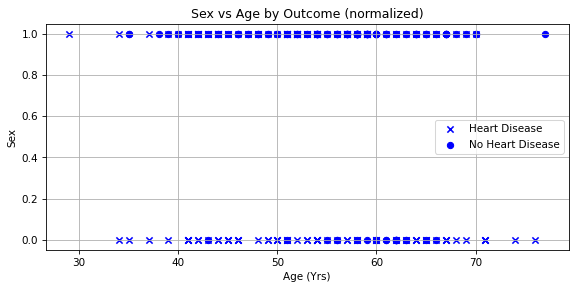

In [21]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
# plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value_n = data_array[i]
    # assign labels values to specific matrix elements
    outcome_n = value_n[13]
    height_n = value_n[0]
    sex_n = value_n[1]
    an = plt.scatter(height_n[outcome_n==0.0],sex_n[outcome_n==0.0], marker = 'x', c= 'b', label = 'Heart Disease')
    bn = plt.scatter(height_n[outcome_n==1.0],sex_n[outcome_n==1.0], marker = 'o', c= 'b', label = 'No Heart Disease')    
    # plot values, title, legend, x and y axis
    plt.title('Sex vs Age by Outcome (normalized)')
    plt.xlabel('Age (Yrs)')
    plt.ylabel('Sex')
    plt.legend(handles=[an,bn])

Section for Data Discovery

In [22]:
pandas_df = df.toPandas()

In [23]:
pandas_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [24]:
pandas_df.dtypes

Age                          int32
Sex                          int32
Chest pain type              int32
BP                           int32
Cholesterol                  int32
FBS over 120                 int32
EKG results                  int32
Max HR                       int32
Exercise angina              int32
ST depression              float64
Slope of ST                  int32
Number of vessels fluro      int32
Thallium                     int32
Heart Disease                int32
dtype: object

In [25]:
pandas_df.shape

(270, 14)

In [26]:
pandas_df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [27]:
import scipy.stats as stats

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

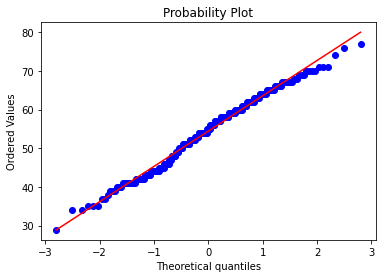

In [28]:
stats.probplot(pandas_df.Age, plot = plt)
plt.figure

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 0, 'Sex'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Sex Histogram')]

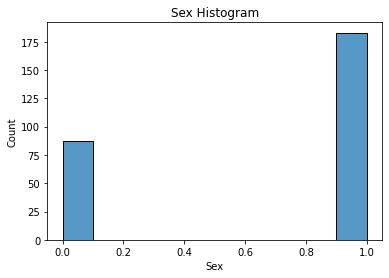

In [30]:
sns1 = sns.histplot(pandas_df.Sex)
sns1.set(xlabel='Sex', ylabel='Count', title='Sex Histogram')

In [31]:
pandas_df = pandas_df.rename(columns={'Chest pain type': 'Chest_pain_type'})
pandas_df = pandas_df.rename(columns={'FBS over 120': 'FBS_over_120'})
pandas_df = pandas_df.rename(columns={'EKG results': 'EKG_results'})
pandas_df = pandas_df.rename(columns={'Max HR': 'Max_HR'})
pandas_df = pandas_df.rename(columns={'Exercise angina': 'Exercise_angina'})
pandas_df = pandas_df.rename(columns={'ST depression': 'ST_depression'})

pandas_df = pandas_df.rename(columns={'Slope of ST': 'Slope_of_ST'})
pandas_df = pandas_df.rename(columns={'Number of vessels fluro': 'Number_of_vessels_fluro'})
pandas_df = pandas_df.rename(columns={'Heart Disease': 'Heart_Disease'})
pandas_df

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [32]:
pandas_dfX = pandas_df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120', 'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression', 'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]
pandas_dfy = pandas_df['Heart_Disease']

In [33]:
#!pip install statsmodels

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
lm.fit(pandas_dfX,pandas_dfy)

LinearRegression()

In [35]:
pandas_dfX2 = sm.add_constant(pandas_dfX)

In [36]:
lm_2 = sm.OLS(pandas_dfy, pandas_dfX2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:          Heart_Disease   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     23.61
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           8.96e-37
Time:                        21:18:38   Log-Likelihood:                -87.906
No. Observations:                 270   AIC:                             203.8
Df Residuals:                     256   BIC:                             254.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

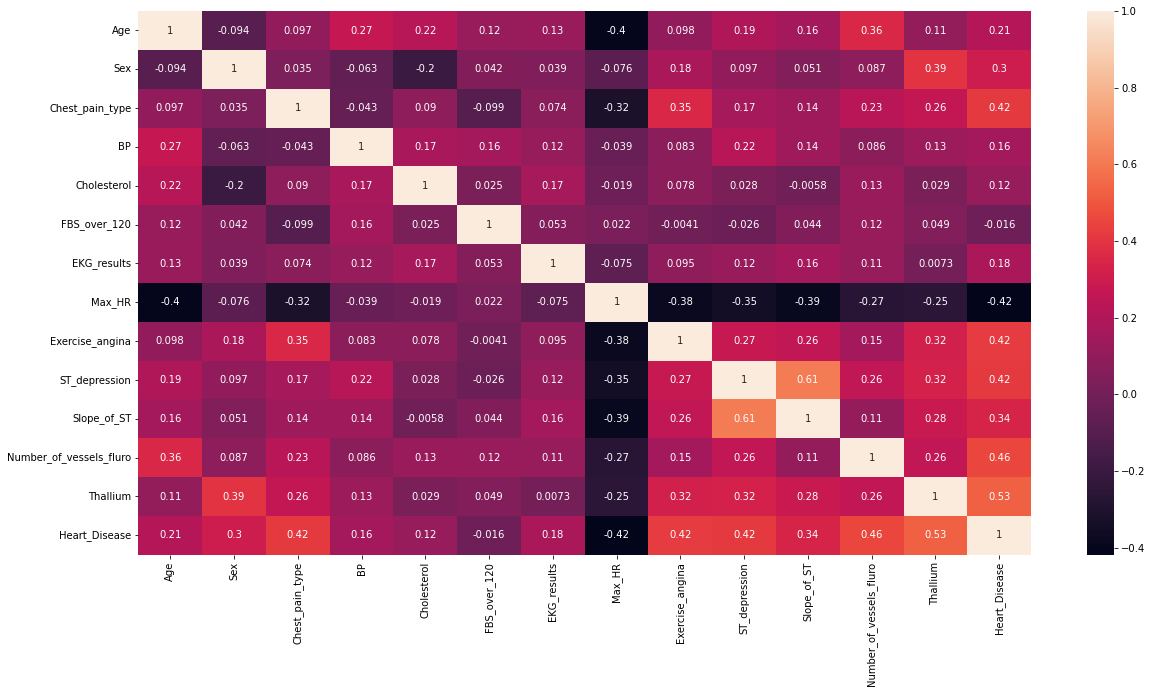

In [37]:
pandas_df2 = pandas_df.drop(['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120', 'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression', 'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium'], axis=1)
plt.figure(figsize = (20,10))
sns.heatmap(pandas_df.corr(),annot = True);

New Section for NN

In [38]:
#Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2024-04-07 21:18:40.940323: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 21:18:43.515111: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [39]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [40]:
#dataset = df.sample(fraction=1.0)

In [41]:
# Select ratio
#ratio = 0.75

In [42]:
#dataset_PD = dataset.toPandas()

In [43]:
#total_rows = dataset_PD.shape[0]
#train_size = int(total_rows*ratio)
#train_size

In [44]:
 # Split data into test and train
#dataset_PD_Train = dataset_PD[0:train_size]
#dataset_PD_Test = dataset_PD[train_size:]

In [45]:
#dataset_PD_Train.shape

In [46]:
#dataset_PD_Test.shape

In [47]:
#data_array_PD_Train =  np.array(dataset_PD_Train.collect())
#data_array_PD_Train

In [48]:
#X_Train = data_array_PD_Train[:,:13]
#y_Train = data_array_PD_Train[:,13]
#print(X_Train,y_Train)

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
 # Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
X = X_train

In [52]:
X.shape

(216, 13)

In [53]:
#X.shape

In [54]:
#dataset.head()

In [55]:
# split into input (X ie dependent variables) and output (Y ie independent variables) variables
#X = dataset.iloc[:,0:13]   #0-13 columns are dependent variables - remember 8th column is not included
#Y = dataset.iloc[:,13]#13 column is independent variable
#Y= Y.reshape(-1,1)
#print(X_train,Y_train)

In [56]:
#type(X)

In [57]:
#X.shape

In [58]:
# create model
model = Sequential()
# model.add(Dense(50, input_dim=13, activation='relu')) # 1000 neurons
# model.add(Dense(50, input_dim=13, activation='relu')) # 100 neurons
# model.add(Dense(100, activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(500, input_dim=13, activation='relu')) # 500 neurons
# 100% accuracy with 500 neurons
# 96% accuracy with 100 neurons
# 90% accuracy with 50 neurons
model.add(Dense(1, activation='sigmoid')) # 1 output neuron

In [59]:
model.layers

[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]

In [60]:
Y = Y_train
#Y= Y.reshape(-1,1)

In [61]:
Y.shape

(216,)

In [62]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2) # 150 epoch, 10 batch size, verbose = 2

Epoch 1/150
22/22 - 1s - 51ms/step - accuracy: 0.7685 - loss: 0.5401
Epoch 2/150
22/22 - 0s - 5ms/step - accuracy: 0.8750 - loss: 0.3594
Epoch 3/150
22/22 - 0s - 6ms/step - accuracy: 0.8657 - loss: 0.3229
Epoch 4/150
22/22 - 0s - 6ms/step - accuracy: 0.8704 - loss: 0.3080
Epoch 5/150
22/22 - 0s - 6ms/step - accuracy: 0.8750 - loss: 0.2939
Epoch 6/150
22/22 - 0s - 5ms/step - accuracy: 0.8935 - loss: 0.2856
Epoch 7/150
22/22 - 0s - 7ms/step - accuracy: 0.8935 - loss: 0.2654
Epoch 8/150
22/22 - 0s - 8ms/step - accuracy: 0.9028 - loss: 0.2605
Epoch 9/150
22/22 - 0s - 6ms/step - accuracy: 0.8981 - loss: 0.2599
Epoch 10/150
22/22 - 0s - 8ms/step - accuracy: 0.9120 - loss: 0.2409
Epoch 11/150
22/22 - 0s - 6ms/step - accuracy: 0.9120 - loss: 0.2318
Epoch 12/150
22/22 - 0s - 5ms/step - accuracy: 0.9167 - loss: 0.2226
Epoch 13/150
22/22 - 0s - 5ms/step - accuracy: 0.9167 - loss: 0.2202
Epoch 14/150
22/22 - 0s - 5ms/step - accuracy: 0.9120 - loss: 0.2177
Epoch 15/150
22/22 - 0s - 6ms/step - accur

Epoch 120/150
22/22 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0096
Epoch 121/150
22/22 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0093
Epoch 122/150
22/22 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0091
Epoch 123/150
22/22 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 124/150
22/22 - 0s - 11ms/step - accuracy: 1.0000 - loss: 0.0087
Epoch 125/150
22/22 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 126/150
22/22 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0085
Epoch 127/150
22/22 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0085
Epoch 128/150
22/22 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0086
Epoch 129/150
22/22 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0083
Epoch 130/150
22/22 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0086
Epoch 131/150
22/22 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0077
Epoch 132/150
22/22 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0075
Epoch 133/150
22/22 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.0074
Epoch 134/150
22/22

In [63]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0045  
compile_metrics: 100.00%


In [82]:
X = X_train
Y = Y_train

In [83]:
X.shape

(216, 13)

In [84]:
Y.shape

(216,)

In [85]:
# calculate predictions
predictions = model.predict(X)    # predicting Y only using X
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[1.14664195e-04]
 [5.63860696e-04]
 [8.82826338e-04]
 [9.99997556e-01]
 [4.63122160e-06]
 [9.99402523e-01]
 [2.09291088e-07]
 [2.24504751e-04]
 [1.64899188e-06]
 [1.02763688e-02]
 [1.06195216e-06]
 [9.95928168e-01]
 [1.84377879e-02]
 [9.98545945e-01]
 [3.56760051e-04]
 [4.91905048e-05]
 [8.93544592e-03]
 [5.85241476e-03]
 [9.99898732e-01]
 [9.32715266e-05]
 [9.99980628e-01]
 [1.01518584e-03]
 [9.95112360e-01]
 [2.04230992e-06]
 [1.01981370e-03]
 [9.99564528e-01]
 [1.00000000e+00]
 [9.78282869e-01]
 [2.77896458e-03]
 [6.09605107e-03]
 [9.94518399e-01]
 [7.55356377e-05]
 [2.37214472e-02]
 [9.97850835e-01]
 [1.00000000e+00]
 [4.23554127e-04]
 [1.00000000e+00]
 [9.98351607e-05]
 [9.90464389e-01]
 [9.99998331e-01]
 [6.28177302e-11]
 [3.29305331e-05]
 [3.19376792e-04]
 [9.97707903e-01]
 [9.78657544e-01]
 [8.98294058e-03]
 [6.77972042e-04]
 [8.05379648e-04]
 [3.72944307e-03]
 [5.10952809e-08]
 [9.99901235e-01]
 [9.90114510e-01]
 [9.91807401e-01]
 [9.8992

In [86]:
# Round predictions
#rounded = [int(numpy.round(x, 0)) for x in predictions]
rounded = [round(x[0]) for x in predictions]
print(rounded)

print("Rounded type: ", type(rounded)) # rounded is a 'list' class
print("Shape of rounded: ", len(rounded))
#print("Dataset type: ", type(dataset)) # numpy array?
#print("Shape of dataset: ", dataset.shape)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
Rounded type:  <class 'list'>
Shape of rounded:  216


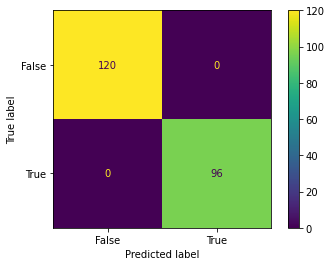

In [87]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y
predicted = rounded

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [88]:
# summarize the first 5 cases
for i in range(5):
	print(str(rounded[i]) + '=>(expected '+ str(Y[i]) +')')

0=>(expected 0.0)
0=>(expected 0.0)
0=>(expected 0.0)
1=>(expected 1.0)
0=>(expected 0.0)


Section for Recursive Feature Elimination

In [89]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [90]:
# Create the RFE object and rank data
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step =1)
rfe.fit(X1, y1 )

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=1)

In [91]:
#X = data_array[:,:13]
#df2 = df.collect()
ranking = rfe.ranking_.reshape(1,13)

In [92]:
ranking

array([[12,  2,  1, 11, 13,  7,  9, 10,  3,  5,  8,  4,  6]])

Section for Recursive Feature Elimination with cross validation

In [93]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [111]:
min_features_to_select = 1
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(estimator=clf, step=1, cv=cv, scoring="accuracy", min_features_to_select=min_features_to_select, n_jobs=2,)
rfecv.fit(X1, y1)

/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), n_jobs=2, scoring='accuracy')

In [112]:
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 12


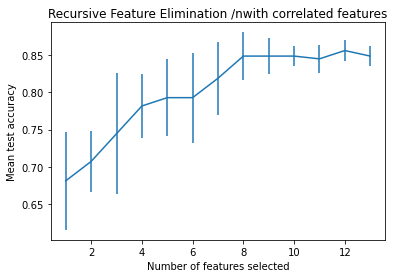

In [113]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(range(min_features_to_select, n_scores + min_features_to_select), rfecv.cv_results_["mean_test_score"], yerr=rfecv.cv_results_["std_test_score"],)
plt.title("Recursive Feature Elimination /nwith correlated features")
plt.show()

In [114]:
rfecv.ranking_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])